In [ ]:
import pandas as pd


df = pd.read_csv('msamd_14454.csv')

denied = df[df['action_taken'] == 3]
denial_reason_counts = denied['denial_reason-1'].value_counts()

print(denial_reason_counts.head(4))

#top reasons are loan denial, pulled application, and pre approval request denied

<ipython-input-3-822374a26677>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


1    6174
3    3011
4    2525
7    1952
Name: denial_reason-1, dtype: int64


<ipython-input-55-f257b43df52d>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('msamd_14454.csv')


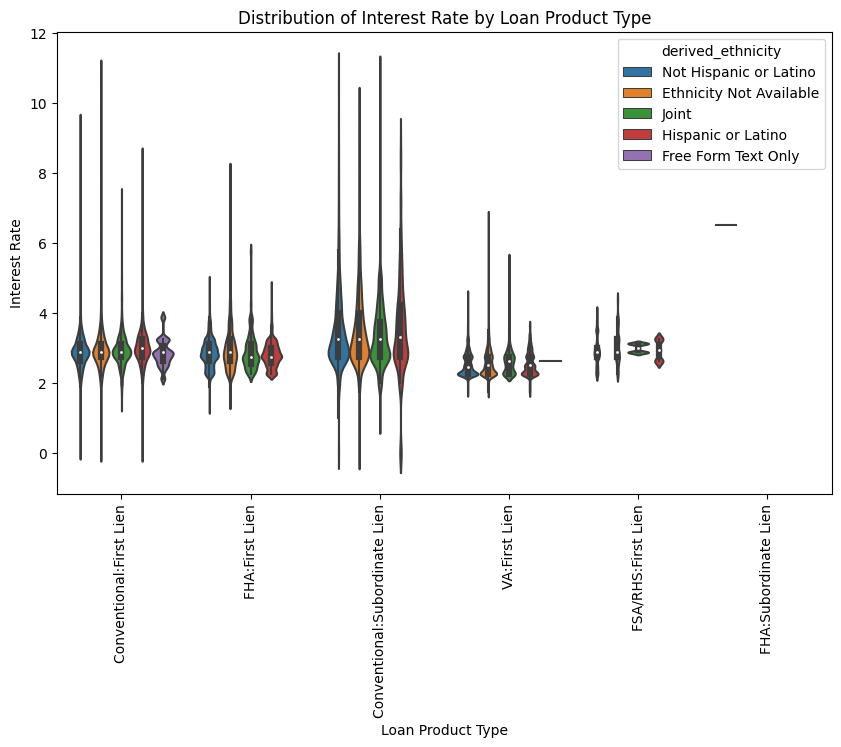

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('msamd_14454.csv')
data['interest_rate'] = pd.to_numeric(data['interest_rate'], errors='coerce')

plt.figure(figsize=(10,6))
sns.violinplot(x='derived_loan_product_type', y='interest_rate', hue='derived_ethnicity', data=data, bw=0.2)
plt.xticks(rotation=90)
plt.xlabel('Loan Product Type')
plt.ylabel('Interest Rate')
plt.title('Distribution of Interest Rate by Loan Product Type')

# Show plot
plt.show()

<ipython-input-14-f1c380c2a015>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('msamd_14454.csv')


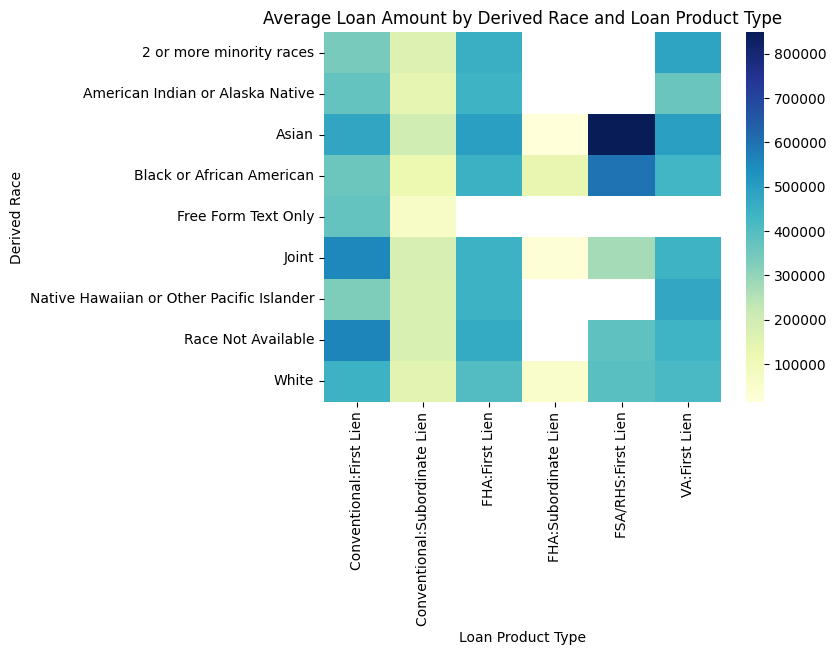

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('msamd_14454.csv')

pivot_table = data.pivot_table(values='loan_amount', index='derived_race', columns='derived_loan_product_type', aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu')

plt.xlabel('Loan Product Type')
plt.ylabel('Derived Race')
plt.title('Average Loan Amount by Derived Race and Loan Product Type')
plt.show()



In [ ]:
import pandas as pd

df = pd.read_csv('msamd_14454.csv')


denied = df[df['action_taken'] == 3]
ethnicity_counts = df['derived_race'].value_counts()
denied_ethnicity_counts = denied['derived_race'].value_counts()
denial_percentages = (denied_ethnicity_counts / ethnicity_counts) * 100

print(denial_percentages)

<ipython-input-5-decb276ba5b7>:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


2 or more minority races                     26.744186
American Indian or Alaska Native             22.627737
Asian                                        11.215933
Black or African American                    20.534197
Free Form Text Only                          38.888889
Joint                                         8.517463
Native Hawaiian or Other Pacific Islander    30.331754
Race Not Available                            8.468152
White                                         9.232979
Name: derived_race, dtype: float64


In [ ]:
import pandas as pd

# read in the CSV file
df = pd.read_csv('msamd_14454.csv')

denied = df[df['action_taken'] == 3]
ethnicity_counts = df.groupby(['derived_race', 'derived_sex']).size().unstack(fill_value=0)
denied_ethnicity_counts = denied.groupby(['derived_race', 'derived_sex']).size().unstack(fill_value=0)
denial_percentages = (denied_ethnicity_counts / ethnicity_counts) * 100

print(denial_percentages)

<ipython-input-6-d0219902d90c>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


derived_sex                                   Female      Joint       Male  \
derived_race                                                                 
2 or more minority races                   23.214286  27.118644  32.142857   
American Indian or Alaska Native           26.530612  21.212121  21.014493   
Asian                                      12.107776   9.527345  12.204545   
Black or African American                  21.852217  16.611406  21.712247   
Free Form Text Only                        50.000000  42.857143  33.333333   
Joint                                      17.346939   8.144973   9.302326   
Native Hawaiian or Other Pacific Islander  27.142857  35.000000  32.978723   
Race Not Available                         14.448101   9.027205  13.151880   
White                                      11.002512   7.039093  10.894628   

derived_sex                                Sex Not Available  
derived_race                                                  
2 or more minor

<ipython-input-16-4b161bc8a60b>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('msamd_14454.csv')


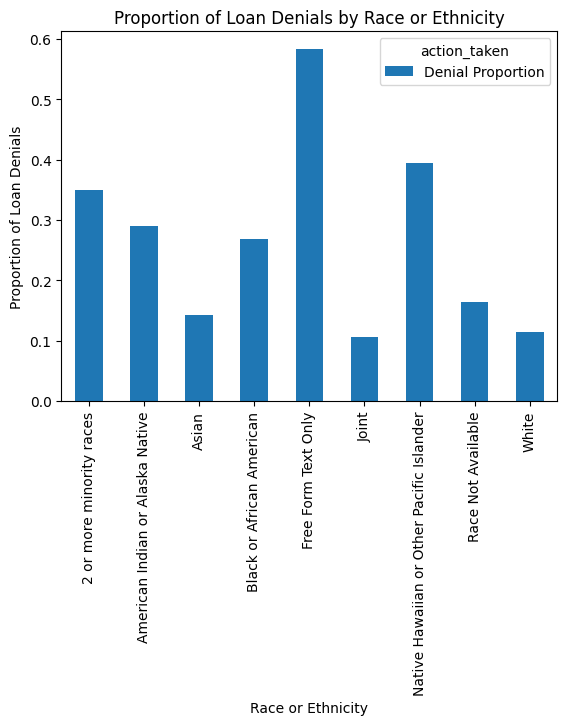

loan_purpose  applicant_race-1
1             1.0                  8
              2.0                 10
              3.0                 10
              4.0                  5
              5.0                 11
                                  ..
32            25.0                 2
              26.0                 3
              27.0                 4
              42.0                 1
              44.0                 3
Name: denial_reason-1, Length: 82, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('msamd_14454.csv')
grouped_data = data.groupby(['derived_race', 'action_taken']).size().unstack()
grouped_data['Denial Proportion'] = grouped_data[3] / (grouped_data[1] + grouped_data[2] + grouped_data[3]) 
grouped_data[['Denial Proportion']].plot(kind='bar', stacked=True)

plt.xlabel('Race or Ethnicity')
plt.ylabel('Proportion of Loan Denials')
plt.title('Proportion of Loan Denials by Race or Ethnicity')

plt.show()
print(data.groupby(['loan_purpose', 'applicant_race-1'])['denial_reason-1'].nunique())

<ipython-input-20-51bfbc3cfaea>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('msamd_14454.csv')


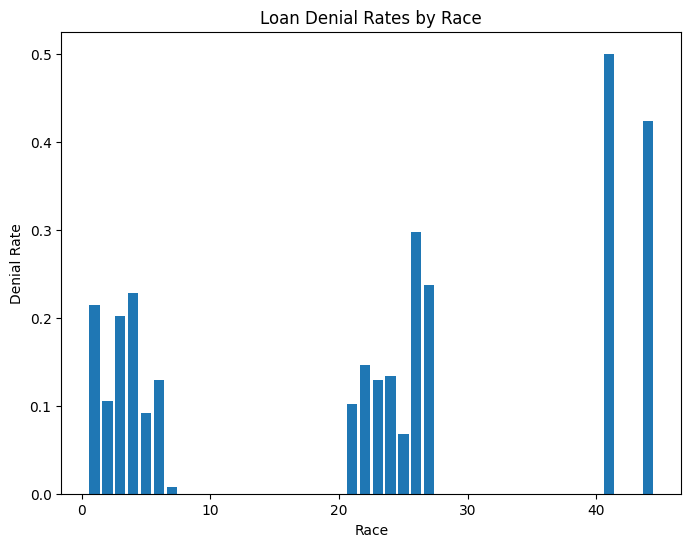

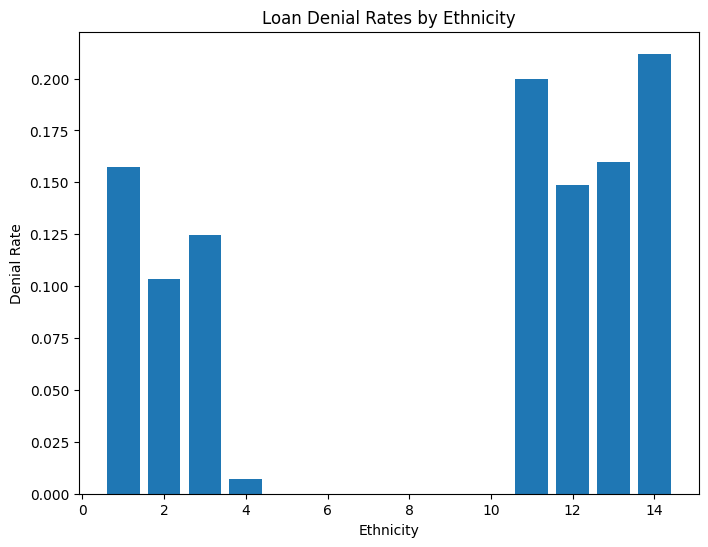

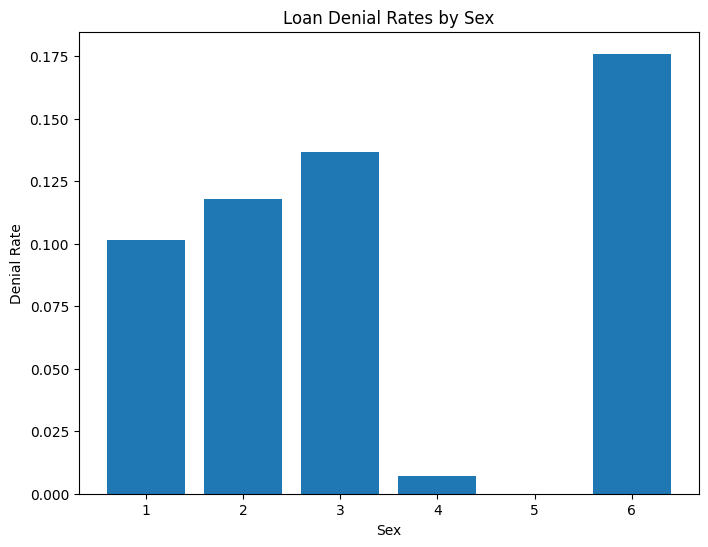

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('msamd_14454.csv')

denied_loans = df[df['action_taken'] == 3]
race_denial_rates = denied_loans.groupby('applicant_race-1')['applicant_race-1'].count() / df.groupby('applicant_race-1')['applicant_race-1'].count()
race_denial_rates = race_denial_rates.dropna()

ethnicity_denial_rates = denied_loans.groupby('applicant_ethnicity-1')['applicant_ethnicity-1'].count() / df.groupby('applicant_ethnicity-1')['applicant_ethnicity-1'].count()
ethnicity_denial_rates = ethnicity_denial_rates.dropna()

sex_denial_rates = denied_loans.groupby('applicant_sex')['applicant_sex'].count() / df.groupby('applicant_sex')['applicant_sex'].count()
sex_denial_rates = sex_denial_rates.dropna()

plt.figure(figsize=(8, 6))
plt.bar(race_denial_rates.index, race_denial_rates.values)
plt.title('Loan Denial Rates by Race')
plt.xlabel('Race')
plt.ylabel('Denial Rate')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(ethnicity_denial_rates.index, ethnicity_denial_rates.values)
plt.title('Loan Denial Rates by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Denial Rate')
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(sex_denial_rates.index, sex_denial_rates.values)
plt.title('Loan Denial Rates by Sex')
plt.xlabel('Sex')
plt.ylabel('Denial Rate')
plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("msamd_14454.csv")

denial_rates = df.groupby(['applicant_race_observed', 'loan_purpose']).agg({'action_taken': ['count', 'sum']})
denial_rates.columns = ['total_loans', 'denied_loans']
denial_rates['denial_rate'] = denial_rates['denied_loans'] / denial_rates['total_loans']

print(denial_rates)

<ipython-input-20-df7d7a7814fe>:5: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


                                      total_loans  denied_loans  denial_rate
applicant_race_observed loan_purpose                                        
1                       1                     343           571     1.664723
                        2                     458           922     2.013100
                        4                     209           382     1.827751
                        31                    602          1145     1.901993
                        32                    202           343     1.698020
2                       1                   34781         64822     1.863719
                        2                    9781         20809     2.127492
                        4                    5599         11948     2.133952
                        5                      14            66     4.714286
                        31                  60967        124244     2.037889
                        32                  31852         64402     2.021914

In [ ]:
import os
print(os.listdir())

['.config', 'cb_2019_us_state_500k.shp', 'cb_2019_us_state_500k.shx', 'boston_zips.csv', 'msamd_14454.csv', 'sample_data']


In [ ]:
import pandas as pd

data = pd.read_csv('msamd_14454.csv')

loan_amount_by_race = data.groupby('applicant_race_observed')['loan_amount'].mean()
print(loan_amount_by_race)
# The average loan amount requested by applicants of race 1 is 294,294.38.
# The average loan amount requested by applicants of race 2 is 408,448.82.

<ipython-input-21-22351dcaa476>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('msamd_14454.csv')


applicant_race_observed
1    294294.377067
2    408448.816034
3    641079.672738
Name: loan_amount, dtype: float64


<ipython-input-2-376521ab449b>:4: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('msamd_14454.csv')


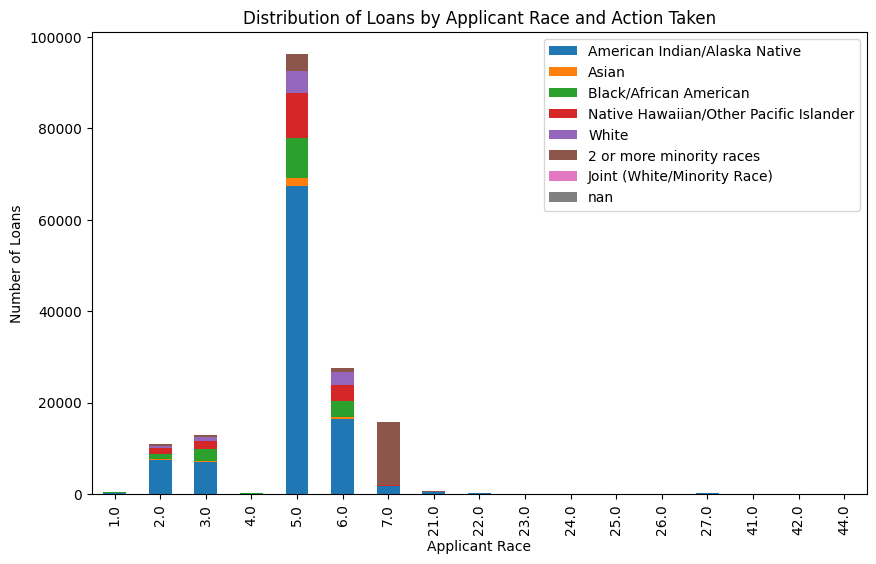

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv('msamd_14454.csv') 

race_codes = {1: 'American Indian/Alaska Native', 
              2: 'Asian', 
              3: 'Black/African American', 
              4: 'Native Hawaiian/Other Pacific Islander', 
              5: 'White', 
              6: '2 or more minority races', 
              7: 'Joint (White/Minority Race)', 
              8: 'Race Not Available'}
  
grouped_data = data.groupby(['applicant_race-1', 'action_taken']).size().reset_index(name='count') 
pivot_data = grouped_data.pivot(index='applicant_race-1', columns='action_taken', values='count') 
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(10,6)) 

ax.set_xlabel('Applicant Race') 
ax.set_ylabel('Number of Loans') 
ax.set_title('Distribution of Loans by Applicant Race and Action Taken') 
ax.legend(labels=pivot_data.index.map(race_codes).tolist())

plt.show()